In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Mark down file to describe the dataset and decide which columns to use

# Feature Table for COMPAS Dataset

| **Feature**                  | **Explanation**                                                                                   | **Range of Values**                             | **Example**             | **Drop (Yes/No)** |
|------------------------------|---------------------------------------------------------------------------------------------------|------------------------------------------------|-------------------------|-------------------|
| id                           | Unique identifier for each record                                                                | Integer                                        | 12345                  | Yes               |
| name                         | Full name of the individual                                                                      | Text                                           | "John Doe"             | Yes               |
| first                        | First name of the individual                                                                     | Text                                           | "John"                | Yes               |
| last                         | Last name of the individual                                                                      | Text                                           | "Doe"                 | Yes               |
| compas_screening_date        | Date of COMPAS screening                                                                         | Date                                           | "2023-01-01"          | Yes               |
| sex                          | Gender of the individual                                                                         | "Male", "Female"                               | "Male"                | No                |
| dob                          | Date of birth                                                                                   | Date                                           | "1990-05-15"          | Yes               |
| age                          | Age of the individual at the time of screening                                                  | Integer (e.g., 18–70)                          | 35                    | No                |
| age_cat                      | Age category                                                                                    | "Less than 25", "25–45", "Greater than 45"     | "25–45"               | No                |
| race                         | Race of the individual                                                                          | "African-American", "Caucasian", etc.          | "African-American"    | No                |
| juv_fel_count                | Number of juvenile felony charges                                                               | Integer (e.g., 0–10)                           | 2                     | No                |
| decile_score                 | Risk score on a scale of 1 to 10                                                                | Integer (1–10)                                 | 7                     | No                |
| juv_misd_count               | Number of juvenile misdemeanor charges                                                          | Integer (e.g., 0–10)                           | 1                     | No                |
| juv_other_count              | Number of other juvenile charges                                                                | Integer (e.g., 0–10)                           | 3                     | No                |
| priors_count                 | Number of prior offenses                                                                        | Integer (e.g., 0–30)                           | 5                     | No                |
| days_b_screening_arrest      | Days between arrest and COMPAS screening                                                        | Integer (e.g., -500 to 500)                    | 15                    | Yes               |
| c_jail_in                    | Jail entry date for the current charge                                                          | Date                                           | "2023-01-05"          | Yes               |
| c_jail_out                   | Jail release date for the current charge                                                        | Date                                           | "2023-01-10"          | Yes               |
| c_case_number                | Case number for the current charge                                                              | Text                                           | "2023ABC123"          | Yes               |
| c_offense_date               | Offense date for the current charge                                                             | Date                                           | "2022-12-31"          | Yes               |
| c_arrest_date                | Arrest date for the current charge                                                              | Date                                           | "2023-01-01"          | Yes               |
| c_days_from_compas           | Days between the COMPAS screening and current charge                                            | Integer (e.g., -500 to 500)                    | -10                   | Yes               |
| c_charge_degree              | Degree of the current charge                                                                    | "M", "F"                                       | "F"                   | No                |
| c_charge_desc                | Description of the current charge                                                               | Text                                           | "Grand Theft"         | No                |
| is_recid                     | Indicator of whether the individual re-offended                                                 | 0 (No), 1 (Yes)                                | 1                     | No                |
| r_case_number                | Case number for recidivism charges                                                              | Text                                           | "2023REC456"          | Yes               |
| r_charge_degree              | Degree of the recidivism charge                                                                 | "M", "F"                                       | "M"                   | Yes               |
| r_days_from_arrest           | Days from arrest to recidivism charge                                                           | Integer (e.g., -500 to 500)                    | 120                   | Yes               |
| r_offense_date               | Offense date for recidivism charge                                                              | Date                                           | "2023-05-01"          | Yes               |
| r_charge_desc                | Description of the recidivism charge                                                            | Text                                           | "Battery"             | Yes               |
| r_jail_in                    | Jail entry date for recidivism charge                                                           | Date                                           | "2023-06-01"          | Yes               |
| r_jail_out                   | Jail release date for recidivism charge                                                         | Date                                           | "2023-06-05"          | Yes               |
| violent_recid                | Indicator of violent recidivism                                                                 | 0 (No), 1 (Yes)                                | 1                     | No                |
| is_violent_recid             | Another indicator of violent recidivism                                                        | 0 (No), 1 (Yes)                                | 0                     | No                |
| vr_case_number               | Case number for violent recidivism charges                                                     | Text                                           | "2023VIO789"          | Yes               |
| vr_charge_degree             | Degree of the violent recidivism charge                                                        | "M", "F"                                       | "F"                   | Yes               |
| vr_offense_date              | Offense date for violent recidivism charge                                                     | Date                                           | "2023-07-01"          | Yes               |
| vr_charge_desc               | Description of the violent recidivism charge                                                   | Text                                           | "Assault"             | Yes               |
| type_of_assessment           | Type of COMPAS assessment performed                                                            | Text                                           | "Risk of Recidivism"  | No                |
| decile_score                 | Risk score on a scale of 1 to 10                                                                | Integer (1–10)                                 | 8                     | No                |
| score_text                   | Textual representation of the risk score                                                       | "Low", "Medium", "High"                        | "High"                | No                |
| screening_date               | Date of the assessment screening                                                               | Date                                           | "2023-01-01"          | Yes               |
| v_type_of_assessment         | Type of violent risk assessment performed                                                      | Text                                           | "Risk of Violence"    | No                |
| v_decile_score               | Violent risk score on a scale of 1 to 10                                                       | Integer (1–10)                                 | 6                     | No                |
| v_score_text                 | Textual representation of the violent risk score                                               | "Low", "Medium", "High"                        | "Medium"              | No                |
| v_screening_date             | Date of the violent risk assessment                                                            | Date                                           | "2023-02-01"          | Yes               |
| in_custody                   | Jail entry date                                                                                | Date                                           | "2023-01-15"          | Yes               |
| out_custody                  | Jail release date                                                                              | Date                                           | "2023-01-20"          | Yes               |
| priors_count                 | Number of prior offenses (duplicate of earlier column)                                         | Integer (e.g., 0–30)                           | 5                     | Yes               |
| start                        | Start date for the log entry                                                                   | Date                                           | "2023-01-01"          | Yes               |
| end                          | End date for the log entry                                                                     | Date                                           | "2023-01-05"          | Yes               |
| event                        | Event description                                                                              | Text                                           | "Screening"           | Yes               |
| two_year_recid               | Indicator of recidivism within two years                                                       | 0 (No), 1 (Yes)                                | 1                     | No                |


In [4]:
# Replace the file path with the location of your CSV file
file_path = '..\Data\Raw\compas-scores-two-years.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if it's loaded correctly
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nagin\AppData\Local\Temp\ipykernel_3276\610315991.py:2: SyntaxWarning: invalid escape sequence '\D'
  file_path = '..\Data\Raw\compas-scores-two-years.csv'


,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [5]:
# To see the names of all the columns in the DataFrame
print(df.columns)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


In [6]:
features_to_drop = [
    'id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'age',
    'days_b_screening_arrest', 'c_case_number',
    'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'r_case_number', 'r_days_from_arrest', 'r_offense_date',
    'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 
    'vr_offense_date', 'type_of_assessment', 'decile_score.1', 'screening_date', 'v_screening_date', 'v_type_of_assessment',
    'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event']

# Drop the irrelevant columns
df2 = df.drop(columns = features_to_drop)

# Display the resulting DataFrame
df2.head()

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,...,is_recid,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,score_text,v_decile_score,v_score_text,two_year_recid
0,Male,Greater than 45,Other,0,1,0,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,...,0,NaN,NaN,0,NaN,NaN,Low,1,Low,0
1,Male,25 - 45,African-American,0,3,0,0,0,2013-01-26 03:45:27,2013-02-05 05:36:53,...,1,(F3),Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),Low,1,Low,1
2,Male,Less than 25,African-American,0,4,0,1,4,2013-04-13 04:58:34,2013-04-14 07:02:04,...,1,(M1),Driving Under The Influence,0,NaN,NaN,Low,3,Low,1
3,Male,Less than 25,African-American,0,8,1,0,1,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,High,6,Medium,0
4,Male,25 - 45,Other,0,1,0,0,2,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,Low,1,Low,0


In [7]:
# Calculating the stay length from the jail in and jail out dates

df2['c_jail_in'] = pd.to_datetime(df2['c_jail_in'])
df2['c_jail_out'] = pd.to_datetime(df2['c_jail_out'])


#Making sure that the c_jail_out hours are treated as PM if they are less than the hours of c_jail_in
df2['c_jail_out'] = df2.apply(lambda x: x['c_jail_out'] + pd.DateOffset(days=1) if x['c_jail_out'] < x['c_jail_in'] else x['c_jail_out'], axis=1)



df2['length_of_stay'] = df2['c_jail_out'] - df2['c_jail_in']

# Converting the length of stay to days and fraction of days rounded to 2 decimal places
df2['length_of_stay'] = df2['length_of_stay'].dt.total_seconds() / (24 * 3600)
df2['length_of_stay'] = df2['length_of_stay'].round(2)


# Display the resulting DataFrame
df2.head()



,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,...,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,score_text,v_decile_score,v_score_text,two_year_recid,length_of_stay
0,Male,Greater than 45,Other,0,1,0,0,0,2013-08-13 06:03:42,2013-08-14 05:41:20,...,NaN,NaN,0,NaN,NaN,Low,1,Low,0,0.98
1,Male,25 - 45,African-American,0,3,0,0,0,2013-01-26 03:45:27,2013-02-05 05:36:53,...,(F3),Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),Low,1,Low,1,10.08
2,Male,Less than 25,African-American,0,4,0,1,4,2013-04-13 04:58:34,2013-04-14 07:02:04,...,(M1),Driving Under The Influence,0,NaN,NaN,Low,3,Low,1,1.09
3,Male,Less than 25,African-American,0,8,1,0,1,NaT,NaT,...,NaN,NaN,0,NaN,NaN,High,6,Medium,0,NaN
4,Male,25 - 45,Other,0,1,0,0,2,NaT,NaT,...,NaN,NaN,0,NaN,NaN,Low,1,Low,0,NaN


In [8]:
# Drop the c_jail_in and c_jail_out columns
df2 = df2.drop(columns = ['c_jail_in', 'c_jail_out'])


In [9]:
# decile_score, score_text, v_decile_score are outputs of the COMPAS algorithm and should not be used as targets to train my model.
# Because doing so would mean that I am training my model to mimic the COMPAS algorithm model which is biased.
# two_year_recid is the target variable that I will use to train my model, because it is an actual output as a result of tracking the individuals for two years.
potential_targets = ['decile_score', 'score_text','v_decile_score', 'v_score_text', 'two_year_recid']
actual_target = 'two_year_recid'
target = df2[actual_target].astype('category')
features = df2.drop(potential_targets ,axis = 1)
target

features[df['is_recid'] == 0]['r_charge_degree'].unique()




array([nan], dtype=object)

In [10]:
features.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,length_of_stay
0,Male,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,0,NaN,NaN,0.98
1,Male,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1,(F3),Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),10.08
2,Male,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1,(M1),Driving Under The Influence,0,NaN,NaN,1.09
3,Male,Less than 25,African-American,0,1,0,1,F,Possession of Cannabis,0,NaN,NaN,0,NaN,NaN,NaN
4,Male,25 - 45,Other,0,0,0,2,F,arrest case no charge,0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
# investigating unique values in each column
for column in features.columns:
    unique_values = df2[column].unique()
    print(f"{column}: {unique_values}")


sex: ['Male' 'Female']
age_cat: ['Greater than 45' '25 - 45' 'Less than 25']
race: ['Other' 'African-American' 'Caucasian' 'Hispanic' 'Native American'
 'Asian']
juv_fel_count: [ 0  2  1  8  4  3  9 20  6  5 10]
juv_misd_count: [ 0  1  6 12  2  4  3  8  5 13]
juv_other_count: [ 0  1  2  3  4 17  9  5  6  7]
priors_count: [ 0  4  1  2 14  3  7  6  5 13  8  9 21 20 15 10 12 28 19 11 22 23 25 24
 36 18 16 33 17 30 27 38 26 37 29 35 31]
c_charge_degree: ['F' 'M']
c_charge_desc: ['Aggravated Assault w/Firearm' 'Felony Battery w/Prior Convict'
 'Possession of Cocaine' 'Possession of Cannabis' 'arrest case no charge'
 'Battery' 'Possession Burglary Tools' 'Insurance Fraud'
 'Poss 3,4 MDMA (Ecstasy)' 'Poss3,4 Methylenedioxymethcath'
 'Felony Driving While Lic Suspd' 'Grand Theft in the 3rd Degree'
 'Driving While License Revoked' 'Possession Of Heroin'
 'Battery on Law Enforc Officer' 'Possession Of Methamphetamine'
 'Introduce Contraband Into Jail' 'Lewd/Lasc Battery Pers 12+/<16'
 'Susp Driv

In [12]:
# Investigating missing values in the dataset
print(features.shape)
print(features.isnull().sum())



(7214, 16)
sex                    0
age_cat                0
race                   0
juv_fel_count          0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_charge_degree        0
c_charge_desc         29
is_recid               0
r_charge_degree     3743
r_charge_desc       3801
is_violent_recid       0
vr_charge_degree    6395
vr_charge_desc      6395
length_of_stay       307
dtype: int64


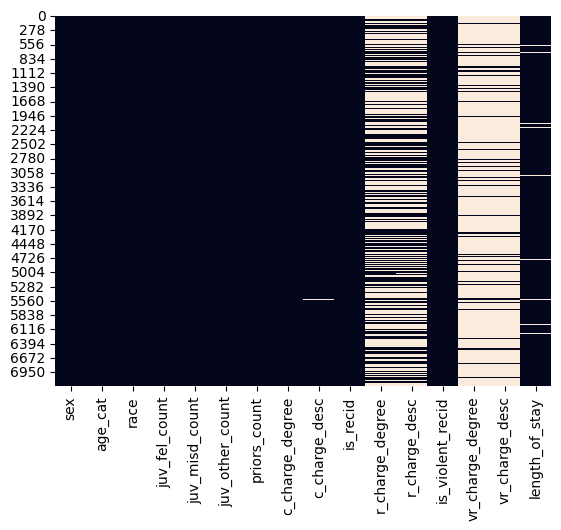

In [13]:
# Visulaizing missing values in the dataset using a heatmap
cmap = sns.mpl_palette("Set2", 2)
sns.heatmap(features.isna(),cbar = False)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

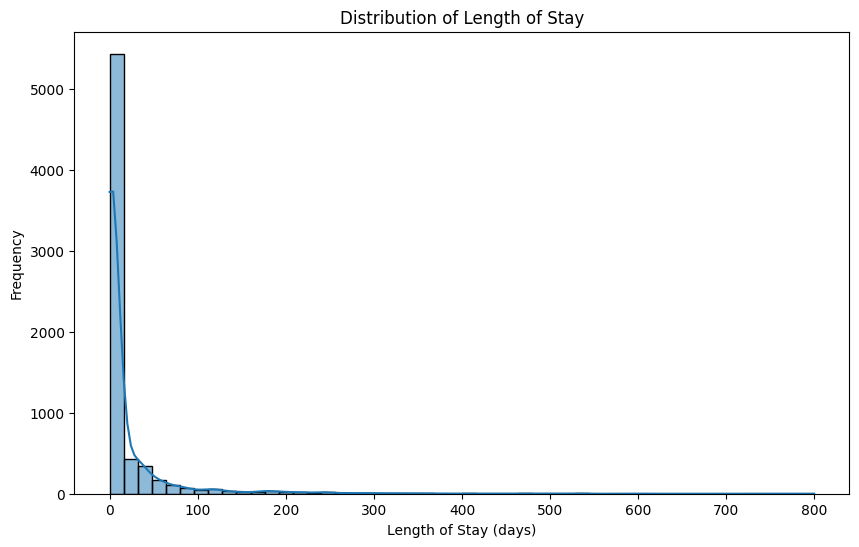

In [14]:
# visualize the distribution of length of stay to decide how to handle the missing values
plt.figure(figsize=(10, 6))
sns.histplot(df2['length_of_stay'], bins=50, kde=True)
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Since the length of stay is right-skewed, I will use the median to fill the missing values
features['length_of_stay'] = features['length_of_stay'].fillna(features['length_of_stay'].median())
features.isnull().sum()

sex                    0
age_cat                0
race                   0
juv_fel_count          0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_charge_degree        0
c_charge_desc         29
is_recid               0
r_charge_degree     3743
r_charge_desc       3801
is_violent_recid       0
vr_charge_degree    6395
vr_charge_desc      6395
length_of_stay         0
dtype: int64

In [16]:
#Replacing/removing the brackets in the r_charge_degree and vr_charge_degree features
features['r_charge_degree'] = features['r_charge_degree'].str.replace('[()]', '', regex=True)
features['vr_charge_degree'] = features['vr_charge_degree'].str.replace('[()]', '', regex=True)

In [17]:
# mapping dictionary if there is a direct relationship
charge_degree_mapping = {
    'F': 'F3',  # Example of mapping
    'M': 'M1',  
}

# Applying the above mapping to fill missing values in both features
features['r_charge_degree'] = features.apply(lambda row: 
                                 charge_degree_mapping.get(row['c_charge_degree'],
                                row['r_charge_degree']) if pd.isna(row['r_charge_degree']) 
                                else row['r_charge_degree'], axis=1)

features['vr_charge_degree'] = features.apply(lambda row: 
                                 charge_degree_mapping.get(row['c_charge_degree'],
                                row['vr_charge_degree']) if pd.isna(row['vr_charge_degree']) 
                                else row['vr_charge_degree'], axis=1)

In [18]:
#Check on any missing values in the r_charge_degree and vr_charge_degree
features.isnull().sum()

sex                    0
age_cat                0
race                   0
juv_fel_count          0
juv_misd_count         0
juv_other_count        0
priors_count           0
c_charge_degree        0
c_charge_desc         29
is_recid               0
r_charge_degree        0
r_charge_desc       3801
is_violent_recid       0
vr_charge_degree       0
vr_charge_desc      6395
length_of_stay         0
dtype: int64

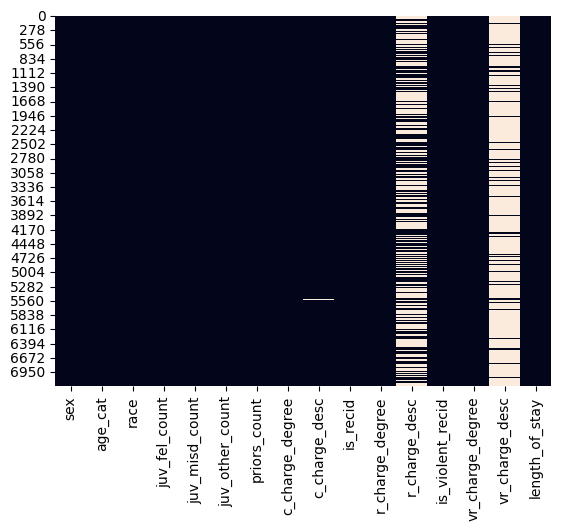

In [19]:
# Visulaizing missing values in the dataset using a heatmap after filling missing values
cmap = sns.mpl_palette("Set2", 2)
sns.heatmap(features.isna(),cbar = False)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.show()

In [274]:
# Only c_charge_desc has missing values that need to be imputed
# r_charge_desc doesn't need imputation since the missing 3801 values are expected for individuals who have is_recid = 0
# vr_charge_degree, vr_charge_desc follow the same pattern as they have each 6395 missing values for individuals who have is violent_recid = 0


# When imputing the missing values in c_charge_desc, we can use the most frequent value in the column conditioned on the value of c_charge_degree[M,F]
# This is because the charge description is likely to depend on the charge degree

def impute_charge_desc(group):
    mode_value = group.mode()[0] if not group.mode().empty else 'Unknown'
    return group.fillna(mode_value)

features['c_charge_desc'] = features.groupby('c_charge_degree')['c_charge_desc'].transform(impute_charge_desc)


In [275]:
# Now we are going to impute the missing values for vr_ charge_degree and vr_charge_desc with 'Not Applicable' since the missing values are for individuals who have is_violent_recid = 0
# but the imputation is conditional on the value of is_violent_recid = 0
# r_charge_desc doesn't need imputation since the missing 3801 values are expected for individuals who have is_recid = 0


features.loc[features['is_recid'] == 0, ['r_charge_degree','r_charge_desc']] = 'Not Applicable'
features.loc[features['is_violent_recid'] == 0, ['vr_charge_degree', 'vr_charge_desc']] = 'Not Applicable'

# Investigating missing values in the dataset
print(features.shape)
print(features.isnull().sum())

(7214, 16)
sex                  0
age_cat              0
race                 0
juv_fel_count        0
juv_misd_count       0
juv_other_count      0
priors_count         0
c_charge_degree      0
c_charge_desc        0
is_recid             0
r_charge_degree      0
r_charge_desc       58
is_violent_recid     0
vr_charge_degree     0
vr_charge_desc       0
length_of_stay       0
dtype: int64


In [276]:
# We still have 58 null values fpr r_charge_desc. This is even for individuals who have is_recid = 1. Those are truly missing values can be imputed with the most frequent value in the column
features['r_charge_desc'] = features['r_charge_desc'].fillna(features['r_charge_desc'].mode()[0])

In [277]:
print(features.isnull().sum())
print(features.shape)

sex                 0
age_cat             0
race                0
juv_fel_count       0
juv_misd_count      0
juv_other_count     0
priors_count        0
c_charge_degree     0
c_charge_desc       0
is_recid            0
r_charge_degree     0
r_charge_desc       0
is_violent_recid    0
vr_charge_degree    0
vr_charge_desc      0
length_of_stay      0
dtype: int64
(7214, 16)


In [282]:
# After imputing the missing values, we Perform EDA

In [283]:
# checking the datatype of length_of_stay
features['length_of_stay'].dtype

dtype('float64')

In [284]:
# First, lets make sure that is_recid and is_violent_recid are categorical features
features['is_recid'] = features['is_recid'].astype('category')
features['is_violent_recid'] = features['is_violent_recid'].astype('category')

# Dividing the features into categorical and numerical features
categorical_features = features.select_dtypes(include=['object', 'category'])
numerical_features = features.select_dtypes(include=['int64', 'float64'])

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

features.dtypes


Categorical Features:          sex          age_cat              race c_charge_degree  \
0       Male  Greater than 45             Other               F   
1       Male          25 - 45  African-American               F   
2       Male     Less than 25  African-American               F   
3       Male     Less than 25  African-American               F   
4       Male          25 - 45             Other               F   
...      ...              ...               ...             ...   
7209    Male     Less than 25  African-American               F   
7210    Male     Less than 25  African-American               F   
7211    Male  Greater than 45             Other               F   
7212  Female          25 - 45  African-American               M   
7213  Female     Less than 25          Hispanic               F   

                       c_charge_desc is_recid r_charge_degree  \
0       Aggravated Assault w/Firearm        0  Not Applicable   
1     Felony Battery w/Prior Convict       

sex                   object
age_cat               object
race                  object
juv_fel_count          int64
juv_misd_count         int64
juv_other_count        int64
priors_count           int64
c_charge_degree       object
c_charge_desc         object
is_recid            category
r_charge_degree       object
r_charge_desc         object
is_violent_recid    category
vr_charge_degree      object
vr_charge_desc        object
length_of_stay       float64
dtype: object

In [285]:
# investigating the descriptive statistics of the numerical features
numerical_features.describe(include=[int, float])


,juv_fel_count,juv_misd_count,juv_other_count,priors_count,length_of_stay
count,7214.000000,7214.000000,7214.000000,7214.000000,7214.000000
mean,0.067230,0.090934,0.109371,3.472415,18.009825
std,0.473972,0.485239,0.501586,4.882538,50.095539
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.000000,2.000000,1.280000
75%,0.000000,0.000000,0.000000,5.000000,8.677500
max,20.000000,13.000000,17.000000,38.000000,799.790000


In [286]:
# investigating the descriptive statistics of the categorical features
categorical_features.describe(include=[object, 'category'])

,sex,age_cat,race,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc
count,7214,7214,7214,7214,7214,7214,7214,7214,7214,7214,7214
unique,2,3,6,2,437,2,11,341,2,10,84
top,Male,25 - 45,African-American,F,Battery,0,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
freq,5819,4109,3696,4666,1179,3743,3743,3801,6395,6395,6395


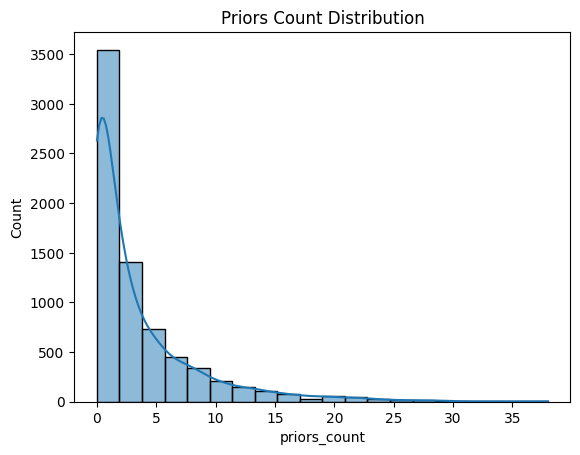

In [226]:
# Visualizing the distribution of the numerical features
# This allows us to see the distribution of the numerical features and check for outliers and skewness

# Distribution for priors_count
sns.histplot(features['priors_count'], bins=20, kde=True)
plt.title('Priors Count Distribution')
plt.show()

In [305]:
full_df = pd.concat([features, target], axis=1)
full_df.head()

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,c_charge_desc,is_recid,r_charge_degree,r_charge_desc,is_violent_recid,vr_charge_degree,vr_charge_desc,length_of_stay,two_year_recid
0,Male,Greater than 45,Other,0,0,0,0,F,Aggravated Assault w/Firearm,0,NaN,NaN,0,NaN,NaN,0.98,0
1,Male,25 - 45,African-American,0,0,0,0,F,Felony Battery w/Prior Convict,1,(F3),Felony Battery (Dom Strang),1,(F3),Felony Battery (Dom Strang),10.08,1
2,Male,Less than 25,African-American,0,0,1,4,F,Possession of Cocaine,1,(M1),Driving Under The Influence,0,NaN,NaN,1.09,1
3,Male,Less than 25,African-American,0,1,0,1,F,Possession of Cannabis,0,NaN,NaN,0,NaN,NaN,NaN,0
4,Male,25 - 45,Other,0,0,0,2,F,arrest case no charge,0,NaN,NaN,0,NaN,NaN,NaN,0


<Figure size 1000x600 with 0 Axes>

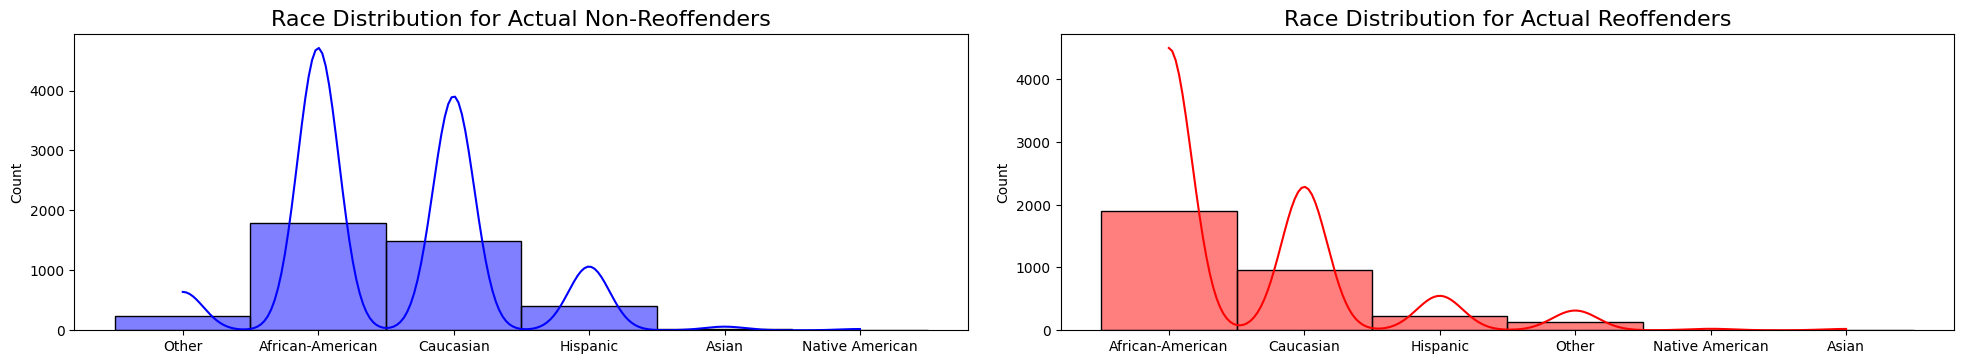

In [ ]:
# Visualizing the distribution of Race conditioned on the two_year_recid
plt.figure(figsize=(10, 6))

class_1= full_df[full_df['two_year_recid'] == 0]['race'].values
class_2= full_df[full_df['two_year_recid'] == 1]['race'].values 

fig, ax = plt.subplots(1, 2, figsize=(20,4)) 

sns.histplot(class_1,kde = True, ax=ax[0], color= 'blue')
ax[0].set_title("Race Distribution for Actual Non-Reoffenders", fontsize=16) 

sns.histplot(class_2,kde = True, ax=ax[1], color= 'red')
ax[1].set_title("Race Distribution for Actual Reoffenders", fontsize=16) 

fig.tight_layout(pad=2.0)
plt.show()

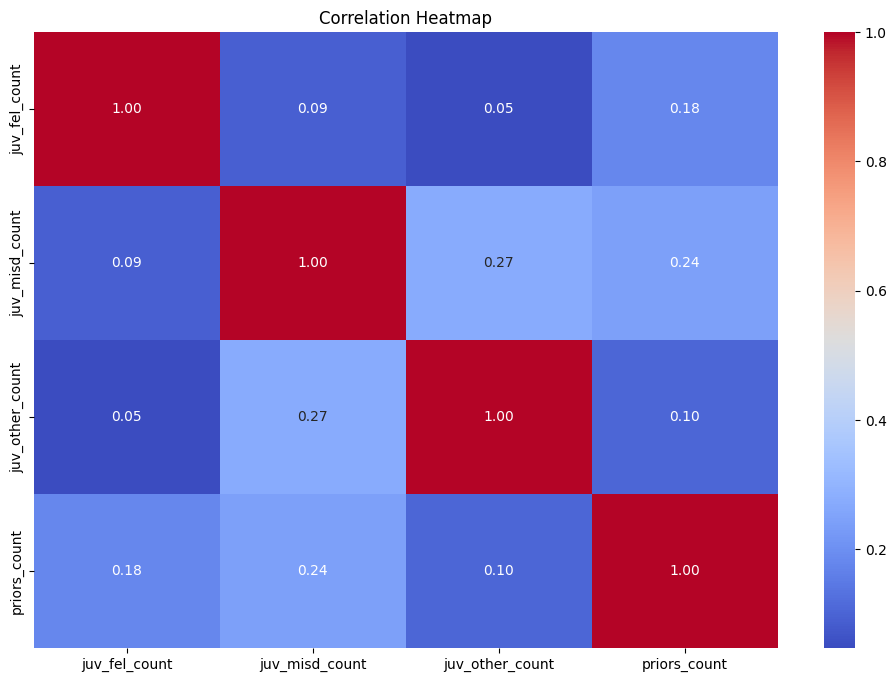

In [228]:
# Check correlation between features and target
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
 

In [289]:

# Group by race and calculate recidivism rates
#Analyze whether certain groups (like races or age categories) have disproportionately high recidivism rates.
recidivism_rates = full_df.groupby('race')['two_year_recid']
print(recidivism_rates.value_counts(normalize=True))


race              two_year_recid
African-American  1                 0.514340
                  0                 0.485660
Asian             0                 0.718750
                  1                 0.281250
Caucasian         0                 0.606357
                  1                 0.393643
Hispanic          0                 0.635793
                  1                 0.364207
Native American   1                 0.555556
                  0                 0.444444
Other             0                 0.647215
                  1                 0.352785
Name: proportion, dtype: float64


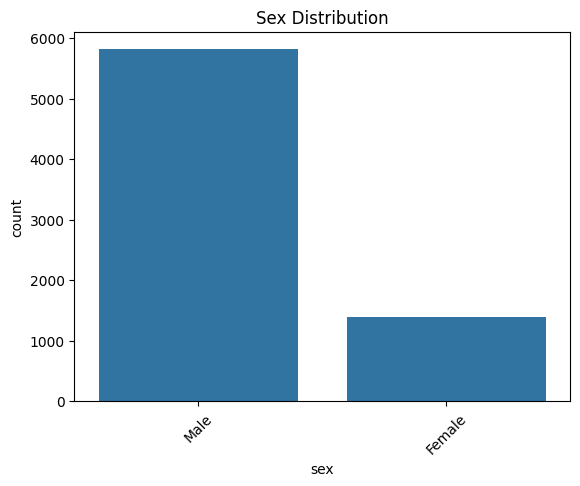

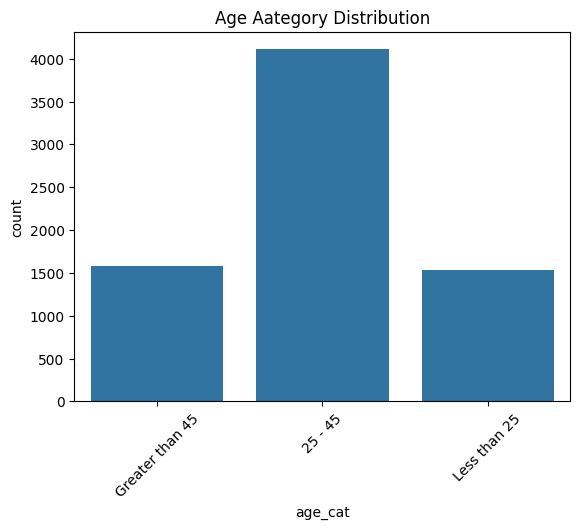

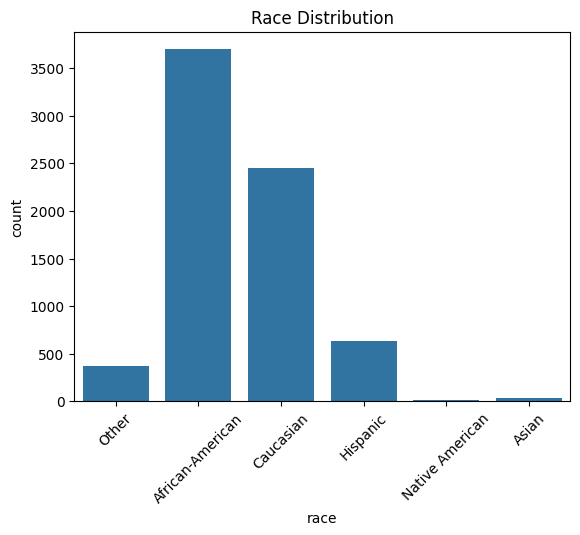

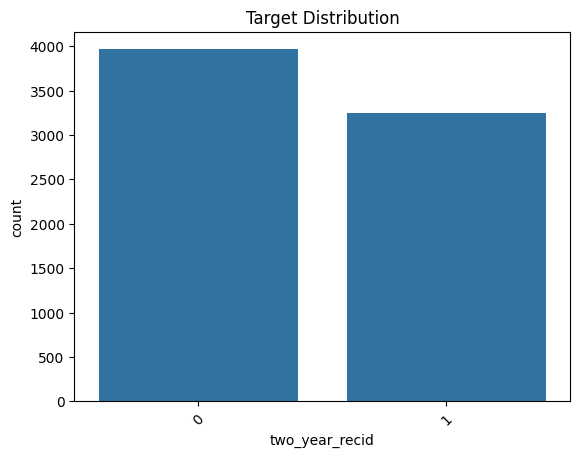

In [314]:
# Now, We check for bias in the dataset as the first step in the fairness analysis


# First we check for different group sizes as a proxy for bias

# Count plot for sex
sns.countplot(x='sex', data=features)
plt.title('Sex Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for Age Categories
sns.countplot(x='age_cat', data=features)
plt.title('Age Aategory Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for race
sns.countplot(x='race', data=features)
plt.title('Race Distribution')
plt.xticks(rotation=45) 
plt.show()

# Count plot for two_year_recid
sns.countplot(x='two_year_recid' , data=df2)
plt.title('Target Distribution')
plt.xticks(rotation=45) 
plt.show()




In [ ]:
# The dataset is imbalanced as there are: more african americans than other, there are more males than females, and there are more individuals
# who did not recidivate than those who did recidivate
# The age categories are also not balanced, with '25 - 45' having the highest number of individuals


# Possible Solution: Resampling the dataset to balance the classes.
# We can use the Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class and make the classes balanced.

# we can also use regularisation techniques to penalize the model for misclassifying the minority class more than the majority class
# Training different classifiers on different groups?????????????

# But first, check for real behavioral differences between the groups, and if there are none, then we can proceed with resampling



In [ ]:
# Secondly, we can check for selection proxy bias: This cannot be done directly in our case because we already included the protected attributes in the dataset
# And we in case of having a suspect proxy feature we cannot check for proxy bias unless we have the protected attribute in the dataset to test correlation
# However, we can still check for proxy selection by testing the relationship between the protected attributes and the criminal history features
# If the protected attributes are correlated with the criminal history features, then there is a proxy selection bias

# one way to test this is to use mutual information to check the relationship between the protected attributes and the criminal history features
# Person correlation cannot be used because the protected attributes are categorical and because correlation only measures linear relationships



# Calculate mutual information between charge degree and race
X = features['c_charge_degree']  # The feature you suspect
y = features['race']             # The protected attribute

mi = mutual_info_classif(X.values.reshape(-1, 1), y)


# We can also use logistic regression to check for proxy selection bias by checking if we have a high
# accuracy when predicting the protected attribute using the criminal history features

# Features excluding race
X = features.drop(columns=['race'])
y = features['race']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Race prediction accuracy:", accuracy_score(y_test, predictions))

# high accuracy of prediction indicates that there is a proxy selection bias


ValueError: could not convert string to float: 'F'

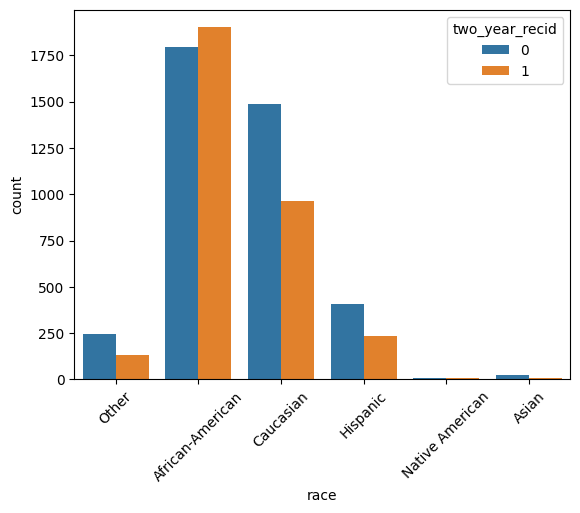

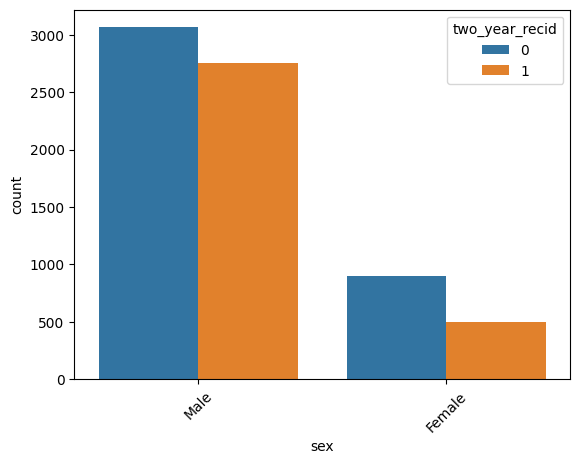

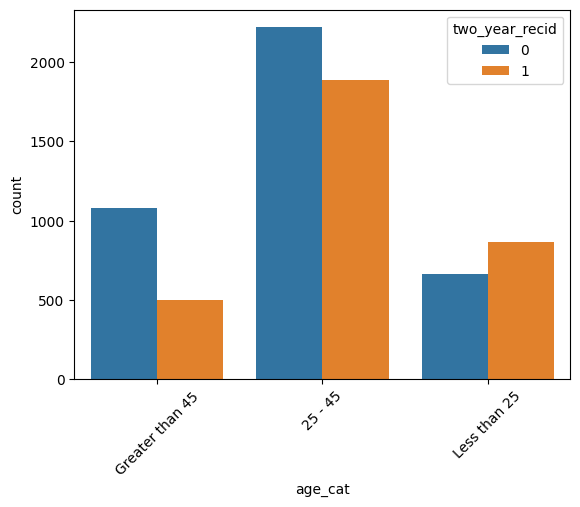

In [317]:
# Next, we check for bias in the dataset by analyzing the recidivism rates for different groups

sns.countplot(x='race', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

sns.countplot(x='sex', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

sns.countplot(x='age_cat', hue='two_year_recid', data=full_df)
plt.xticks(rotation=45) 
plt.show()

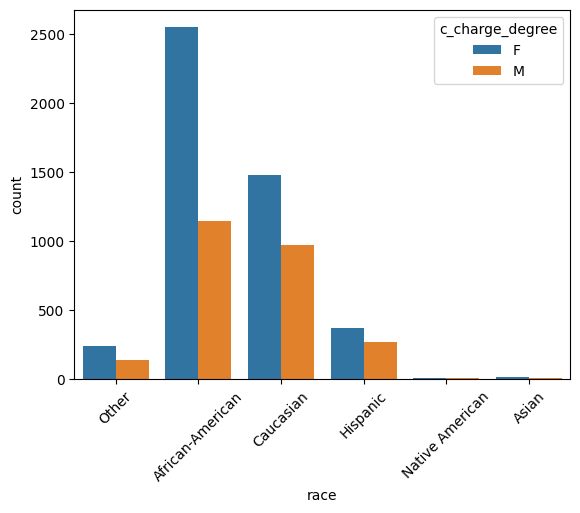

In [324]:
# Lets analyze the charge degree for different groups
sns.countplot(x='race', hue='c_charge_degree', data=full_df)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Now, lets check the Definition of metrics as a potential source of bias in the dataset
# 1. How the reoffense two_year_recid    is defined is it charging, conviction, or just arrest which reflect policing practices rather than actual criminal behavior
# 2. How the categories are grouped for age and others for race, since a broad category might miss important differences between groups
# 3. why the period of two years was chosen to measure recidivism, and not a longer(might exaggerate risk) or shorter period (too short to capture actual recidivism)


# Now lets check the potential bias that might come from the Codebook: How data was recorded, to do so we have to
# go back to the documentation of the dataset and ask the following questions:
# 1. How were the sensitive attributes collected? Were they self-reported or observed?
# 2. Were the sensitive attributes collected by the same person who collected the criminal history features?
# 3. Ambiguity in the definitions: do proir counts include arrests or convictions?


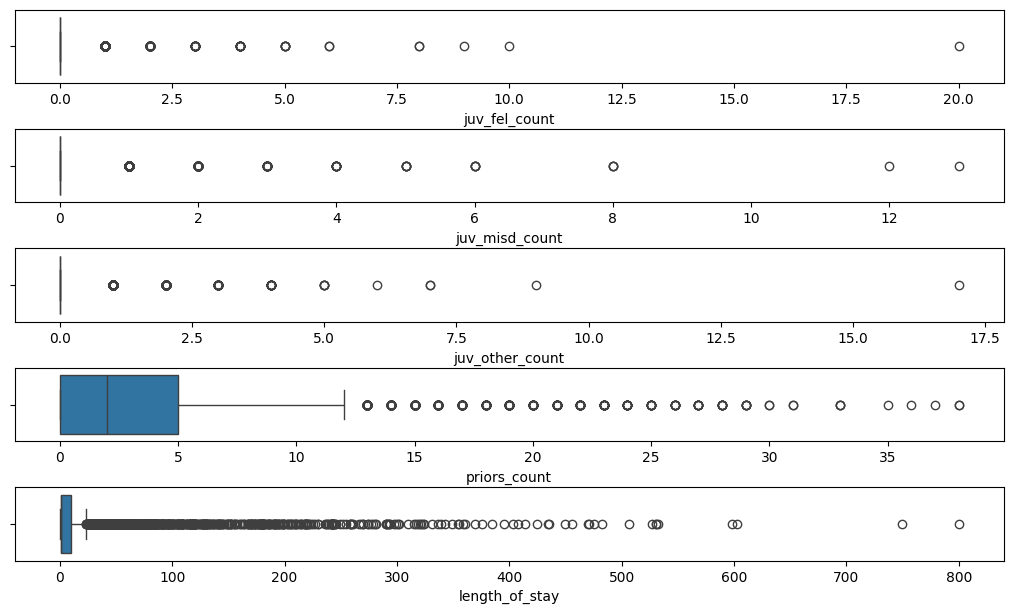

In [334]:
# We can examin the existance of outliers in the dataset for numerical features by using boxplots
fig, ax = plt.subplots(5,figsize = (10,6))
numerical_columns = numerical_features.columns
for i in range(5):
    sns.boxplot(x=features[numerical_columns[i]],ax=ax[i])
fig.tight_layout(pad=0.2)


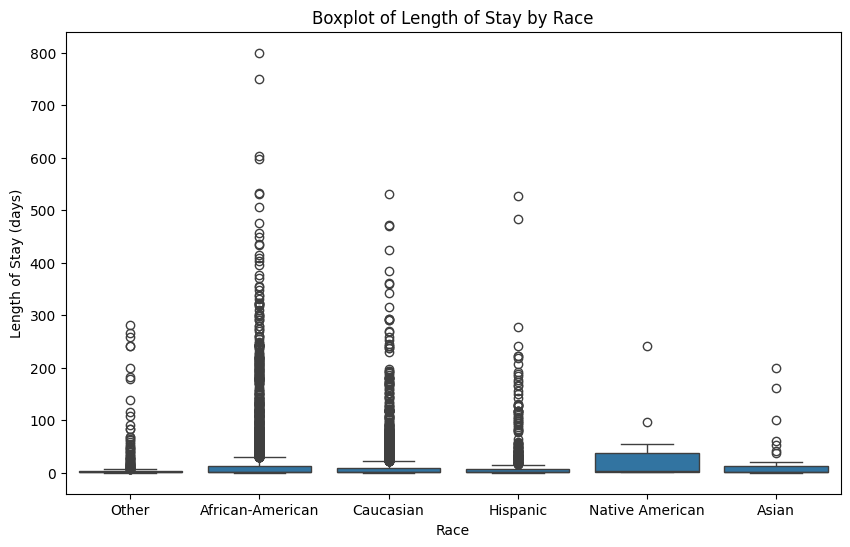

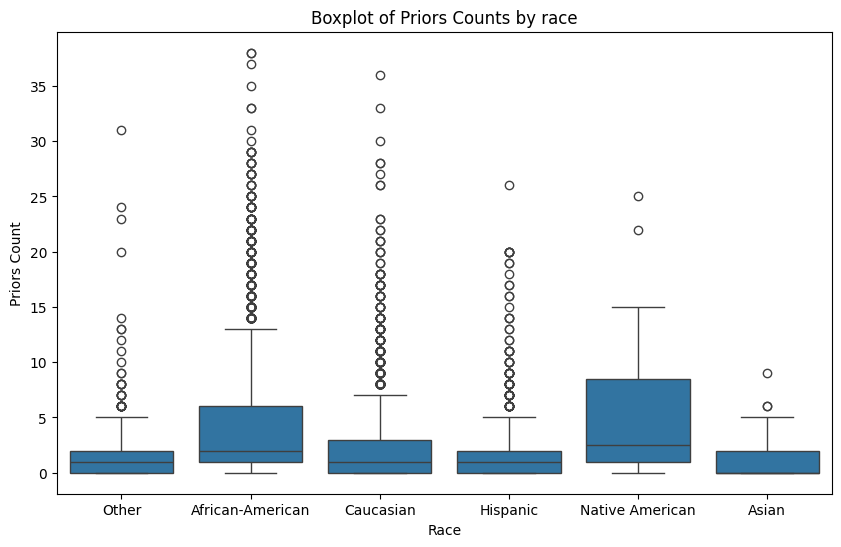

In [329]:
# A more detailed look at the outliers in the length of stay for different groups, this might indicate bias in the treatment of different groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='length_of_stay', data=features)
plt.title("Boxplot of Length of Stay by Race")
plt.xlabel("Race")
plt.ylabel("Length of Stay (days)")
plt.show()

# A more detailed look at the outliers in the priors count for different groups, this might indicate targeted policing of certain groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='priors_count', data=features)
plt.title("Boxplot of Priors Counts by race")
plt.xlabel("Race")
plt.ylabel("Priors Count")
plt.show()

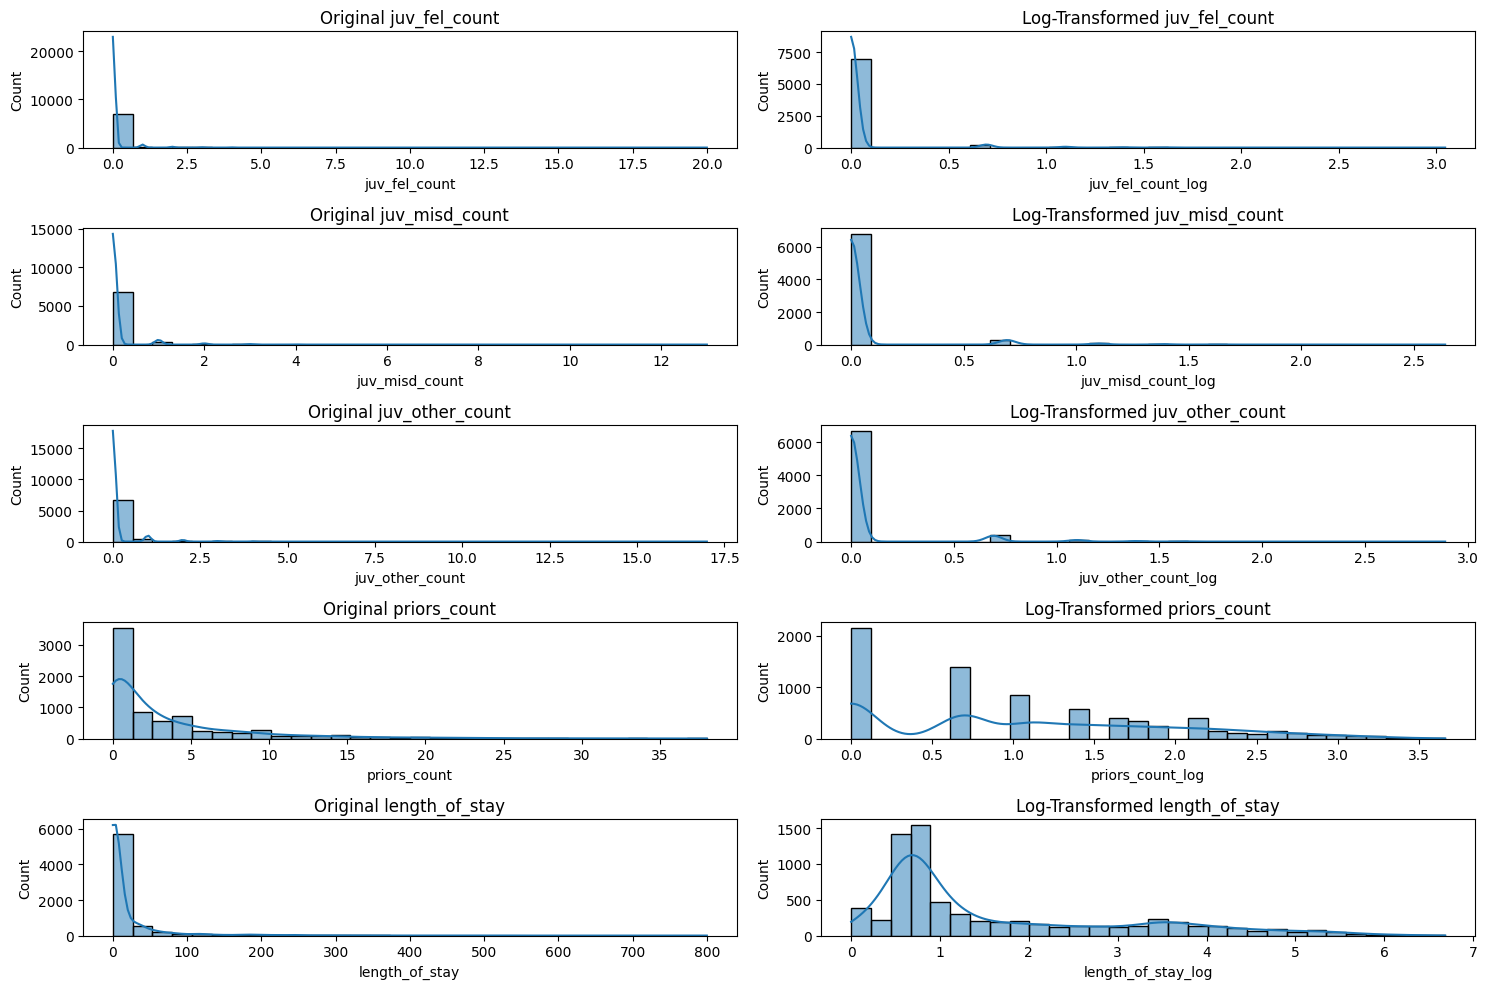

In [ ]:
# We can deal with outliers by using Log transformation, which compresses the range of the data and reduces the effect of outliers and reduce skewness
numerical_columns = ['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'length_of_stay']

# Apply log transformation (log(1 + x)) to each feature
for feature in numerical_columns:
    features[f'{feature}_log'] = np.log1p(features[feature])

# Plot original and log-transformed distributions
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_columns):
    # Original distribution
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.histplot(features[feature], bins=30, kde=True)
    plt.title(f"Original {feature}")

    # Log-transformed distribution
    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.histplot(features[f'{feature}_log'], bins=30, kde=True)
    plt.title(f"Log-Transformed {feature}")

plt.tight_layout()
plt.show()


In [341]:
# Attention
features.columns

Index(['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'c_charge_degree', 'c_charge_desc',
       'is_recid', 'r_charge_degree', 'r_charge_desc', 'is_violent_recid',
       'vr_charge_degree', 'vr_charge_desc', 'length_of_stay',
       'length_of_stay_log', 'juv_fel_count_log', 'juv_misd_count_log',
       'juv_other_count_log', 'priors_count_log'],
      dtype='object')

In [ ]:
# Earlier we imputed the missing values in the dataset using simple imputation techniques: mode for categorical features and median for numerical features
# WE might want to use more advanced imputation techniques like KNN imputation to impute the missing values in the dataset
# Random Forest imputation can also be used to impute the missing values in the dataset: for numerical and categorical features separately
# Unlike KNN imputer, the latter requires hyperparameter tuning to get the best results

In [ ]:
# Pipeline for data preprocessing, and ensure that the preprocessing steps are applied to the test set as well
# Do this for all preprocessing steps including imputation, encoding, scaling, and outlier handling

In [290]:

# Starting with logistic regression since it is inherently interpretable, Checking for assumptions of logistic regression
# Go Back to GPT And check for the other assumptions of logistic regression





In [179]:
# some features are dropped from the beginning before any EDA as a result of domain knowledge and basic understanding of the dataset
# some features are dropped as a result of EDA, like dropping jail in and jail out for being highly correlated with charge degree

In [180]:
# It is better to go back and calculate the stay length jail_out - jail_in and then drop the jail_in and jail_out columns,
# DO THIS for othr in out dates. Afterwards check if the length is correlated with charge degree, then we can drop the length column and the dates columns

In [181]:
# Draw some conclusions from the EDA for the bias in the data and the real world.
# Leave analyzing the bias in the model, results and evaluation for the next notebook.

In [182]:
# After EDA I need to do: 1. More Feature selection, 2. Encoding 3. scaling

In [183]:
# Check if using a simple model like logistic regression can give a good accuracy check if the assumptions of logistic regression are met
# but first  we need to see if the assumptions of logistic regression are met

In [184]:
# Check if using another simple model like Decision Tree can give a good accuracy
# but first  we need to see if the assumptions of Decision Tree are met 

In [185]:
# Check if using a complex  model like Random Forest can give a good accuracy
# but first  we need to see if the assumptions of Random Forest are met

In [186]:
# Check if using a complex  model like Neural Networks can give a good accuracy
# but first  we need to see if the assumptions of Neural Networks are met